# Retail Pricing Strategy Optimization

## Import Libraries

In [2]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [5]:
!pip install seaborn scikit-learn joblib matplotlib

Defaulting to user installation because normal site-packages is not writeable


## Load Dataset

In [3]:
df = pd.read_csv('retail_price.csv')
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [4]:
print("Shape of dataset:", df.shape)

Shape of dataset: (676, 30)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [6]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


## Missing Values


In [7]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64


## Preprocessing


In [8]:
# Convert month_year
if 'month_year' in df.columns:
    df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y', dayfirst=True)

## Label Encode Categorical

In [9]:
if 'product_category_name' in df.columns:
    le = LabelEncoder()
    df['product_category_name_encoded'] = le.fit_transform(df['product_category_name'])

## Drop unneeded columns


In [10]:
drop_cols = ['product_id', 'product_category_name']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

## Exploratory Data Analysis


Text(0.5, 1.0, 'Unit Price Distribution')

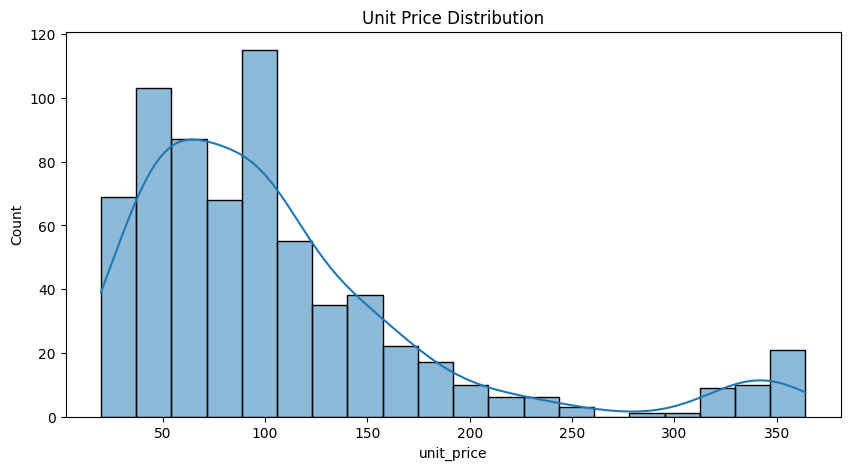

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['unit_price'], kde=True)
plt.title("Unit Price Distribution")

Text(0.5, 1.0, 'Boxplot of Key Numeric Features')

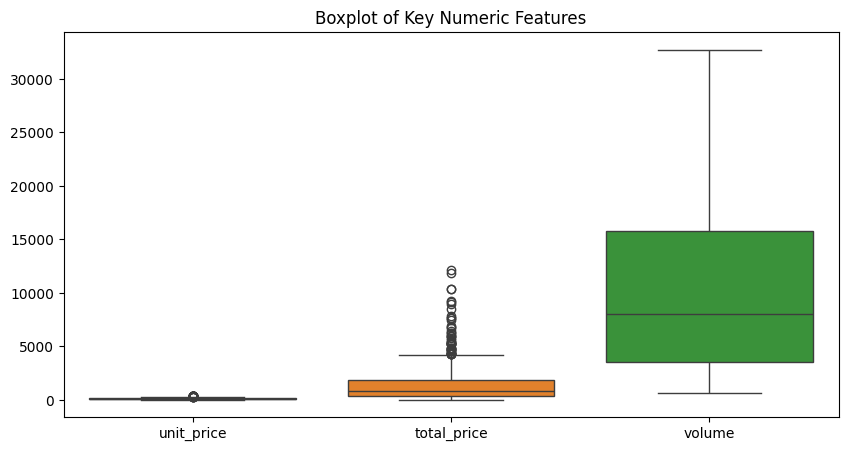

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['unit_price', 'total_price', 'volume']])
plt.title("Boxplot of Key Numeric Features")

## Correlation heatmap


Text(0.5, 1.0, 'Correlation Matrix')

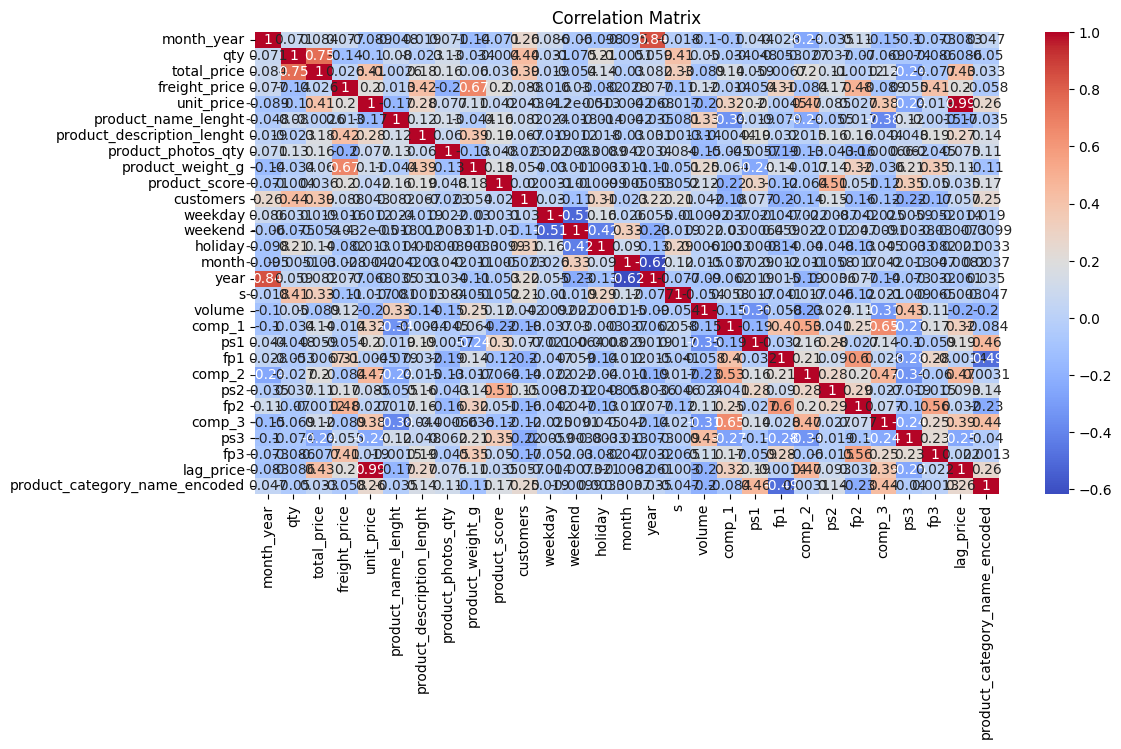

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

## Feature Selection


In [14]:
# Price per gram (unit_price / product_weight_g)
df['price_per_gram'] = df['unit_price'] / df['product_weight_g']

# Discount or Price Difference (comp_1 - unit_price)
df['price_gap_vs_competitor'] = df['comp_1'] - df['unit_price']

# Weekend flag (if weekday column exists)
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# Volume bucket (categorical)
df['volume_bucket'] = pd.qcut(df['volume'], q=4, labels=False)

# Normalized product score (0 to 1 scale)
df['normalized_score'] = df['product_score'] / df['product_score'].max()

# Price to score ratio
df['price_per_score'] = df['unit_price'] / (df['product_score'] + 1)  # +1 to avoid divide by zero


In [37]:
target = 'unit_price'

# Remove leakage features like total_price and month_year
leakage_cols = ['qty', 'total_price', 'month_year']

features = [
    'product_category_name_encoded',
    'product_weight_g',
    'volume',
    'freight_price',         
    'product_score',        
    'is_weekend',          
]

X = df[features]
y = df[target]

## Scale Features


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train-Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## Modeling - Linear Regression


In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

## Modeling - Random Forest


In [47]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,              # Lower the depth even more
    min_samples_split=15,     # Larger split threshold = more general model
    min_samples_leaf=10,      # Avoid learning from very small leaf nodes
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## Evaluation


In [48]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))

In [49]:
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


Linear Regression Evaluation:
MSE: 5179.077837615115
RMSE: 71.96581019911548
R2 Score: 0.04131878372791764

Random Forest Evaluation:
MSE: 780.3376605654482
RMSE: 27.934524527284303
R2 Score: 0.8555543899918906


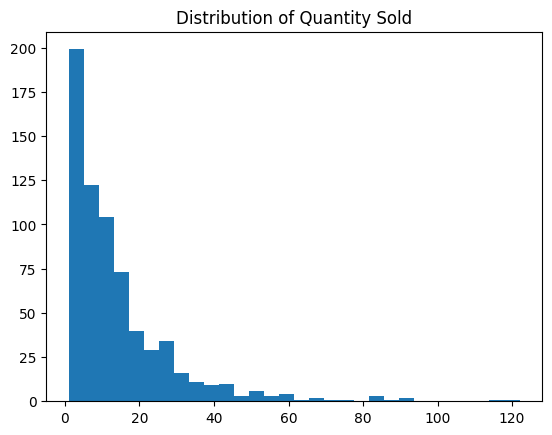

In [50]:
import matplotlib.pyplot as plt
plt.hist(df['qty'], bins=30)
plt.title("Distribution of Quantity Sold")
plt.show()


## Price Elasticity of Demand


In [51]:
df['price_change_pct'] = df['unit_price'].pct_change()
df['qty_change_pct'] = df['qty'].pct_change()
df['elasticity'] = df['qty_change_pct'] / df['price_change_pct']
print("\nElasticity Sample:")
display(df[['unit_price', 'qty', 'price_change_pct', 'qty_change_pct', 'elasticity']].head(10))


Elasticity Sample:


,unit_price,qty,price_change_pct,qty_change_pct,elasticity
0,45.950000,1,NaN,NaN,NaN
1,45.950000,3,0.000000,2.000000,inf
2,45.950000,6,0.000000,1.000000,inf
3,45.950000,4,0.000000,-0.333333,-inf
4,45.950000,2,0.000000,-0.500000,-inf
5,45.950000,3,0.000000,0.500000,inf
6,40.531818,11,-0.117915,2.666667,-22.615213
7,39.990000,6,-0.013368,-0.454545,34.003203
8,39.990000,19,0.000000,2.166667,inf
9,39.990000,18,0.000000,-0.052632,-inf


In [52]:
import joblib

model_data = {
    "model": rf,               # Final tuned Random Forest model
    "columns": X.columns       # Features used for prediction
}

joblib.dump(model_data, "price_prediction_model.pkl")
print("Final model saved as 'price_prediction_model.pkl'")


Final model saved as 'price_prediction_model.pkl'
